In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "second_cars_info.csv"
data = pd.read_csv(path,encoding='gbk')

In [3]:
data.head(10)

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万
5,奥迪,奥迪R8 2014款 Spyder 5.2 FSI quattro,未上牌,0.03万公里,"国4,京5",169.00,273.86万
6,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万
7,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万
8,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万
9,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万


In [4]:
#数据结构
data.shape

(11281, 7)

In [22]:
#数据表格列名
data.columns

Index(['Brand', 'Name', 'Boarding_time', 'Km', 'Discharge', 'Sec_price',
       'New_price'],
      dtype='object')

In [23]:
#查看每一个品牌的数据量
data.Brand.value_counts()

别克      1350
大众       991
奔驰       895
宝马       773
奥迪       758
        ... 
世爵         1
东风风光       1
开瑞         1
昌河         1
中欧房车       1
Name: Brand, Length: 104, dtype: int64

In [24]:
#查看上牌时间列不合规数据
data.Boarding_time

0         2006年8月
1         2007年1月
2         2005年5月
3        2013年10月
4         2014年9月
           ...   
11276     2016年6月
11277     2011年6月
11278    2007年10月
11279    2011年12月
11280     2014年4月
Name: Boarding_time, Length: 11281, dtype: object

In [25]:
data.Boarding_time.value_counts()

2010年8月     223
2010年6月     200
2010年5月     172
2010年11月    164
2011年6月     160
           ... 
2000年7月       1
1997年12月      1
2003年2月       1
2002年2月       1
2003年5月       1
Name: Boarding_time, Length: 188, dtype: int64

In [26]:
#未上牌车辆记录比例
N = np.sum(data.Boarding_time == "未上牌")
ratio = N / data.shape[0]
ratio

0.00824395000443223

In [27]:
#删除“未上牌”记录，序列号变成不连续
data = data[data.Boarding_time != "未上牌"]

In [28]:
#处理索引，使其连续
data.index = np.arange(0,data.shape[0])
data.head(10)

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万
5,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万
6,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万
7,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万
8,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万
9,奥迪,奥迪R8 2016款 V10 Coupe Performance,2017年8月,0.24万公里,国5,229.90,275.49万


In [29]:
#提取年份数字
data['year'] = data.Boarding_time.str[:4].astype("int")
data.head(10)

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014
5,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万,2014
6,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万,2014
7,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万,2013
8,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万,2013
9,奥迪,奥迪R8 2016款 V10 Coupe Performance,2017年8月,0.24万公里,国5,229.90,275.49万,2017


In [30]:
#提取月份数字
data['month'] = data.Boarding_time.str[5:-1].astype("int")
data.head(10)

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9
5,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万,2014,8
6,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万,2014,9
7,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万,2013,7
8,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万,2013,5
9,奥迪,奥迪R8 2016款 V10 Coupe Performance,2017年8月,0.24万公里,国5,229.90,275.49万,2017,8


In [31]:
#新增一列，计算上牌时间距离2017年10月的总月份数
data['diff_month'] = (2017-data.year)*12 + (10 - data.month)
data.head(10)

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_month
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37
5,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万,2014,8,38
6,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万,2014,9,37
7,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万,2013,7,51
8,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万,2013,5,53
9,奥迪,奥迪R8 2016款 V10 Coupe Performance,2017年8月,0.24万公里,国5,229.90,275.49万,2017,8,2


In [32]:
#去掉汉字保留数字
data["Km_number"] = data.Km.str[:-3]

In [33]:
#转换时报错，发现除“万公里”字符串外，还有字符串“百公里内”
data["Km_number"] = data.Km_number.astype("float")


ValueError: could not convert string to float: '百'

In [34]:
#去掉含“百公里内”字符串数据
data = data[~(data.Km_number.str.contains("百"))]
index = data[~(data.Km_number.str.contains("百"))].index
data = data.loc[index,:]

In [35]:
#转换成浮点数
data["Km_number"] = data.Km_number.astype("float")

In [36]:
data.head(10)

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_month,Km_number
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81
5,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万,2014,8,38,1.60
6,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万,2014,9,37,1.60
7,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万,2013,7,51,3.00
8,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万,2013,5,53,7.00
9,奥迪,奥迪R8 2016款 V10 Coupe Performance,2017年8月,0.24万公里,国5,229.90,275.49万,2017,8,2,0.24


In [37]:
#提取价格数字
data["New_price_number"] = data.New_price.str[:-1]
data.head(10)

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_month,Km_number,New_price_number
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00,50.89
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00,50.89
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00,54.24
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80,101.06
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81,54.99
5,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万,2014,8,38,1.60,69.25
6,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万,2014,9,37,1.60,114.84
7,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万,2013,7,51,3.00,79.02
8,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万,2013,5,53,7.00,130.04
9,奥迪,奥迪R8 2016款 V10 Coupe Performance,2017年8月,0.24万公里,国5,229.90,275.49万,2017,8,2,0.24,275.49


In [38]:
#转换时，发现还包含字符串“暂无报价”
data.New_price_number.astype("float")

ValueError: could not convert string to float: '暂'

In [39]:
data = data.loc[data.New_price != "暂无",:]#消除含“暂无报价”字符串的数据
data.New_price_number.astype("float")

0         50.89
1         50.89
2         54.24
3        101.06
4         54.99
          ...  
11183      9.63
11184      6.22
11185     11.48
11186      8.99
11187    168.25
Name: New_price_number, Length: 10984, dtype: float64

In [40]:
data.head(10)

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_month,Km_number,New_price_number
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00,50.89
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00,50.89
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00,54.24
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80,101.06
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81,54.99
5,奥迪,奥迪A6 2013款 40 hybrid,2014年8月,1.60万公里,"国4,京5",36.99,69.25万,2014,8,38,1.60,69.25
6,奥迪,奥迪S6 2013款 4.0TFSI,2014年9月,1.60万公里,欧5,59.99,114.84万,2014,9,37,1.60,114.84
7,奥迪,奥迪A7 2011款 2.8 自动 进取型,2013年7月,3.00万公里,欧4,37.99,79.02万,2013,7,51,3.00,79.02
8,奥迪,奥迪RS 5 2012款 4.2L 双离合 quattro Coupe,2013年5月,7.00万公里,"国4,国5",56.80,130.04万,2013,5,53,7.00,130.04
9,奥迪,奥迪R8 2016款 V10 Coupe Performance,2017年8月,0.24万公里,国5,229.90,275.49万,2017,8,2,0.24,275.49


In [41]:
data.Sec_price.value_counts()

4.50     91
4.80     83
8.80     79
5.50     75
4.88     72
         ..
10.45     1
4.67      1
16.55     1
18.85     1
15.10     1
Name: Sec_price, Length: 1899, dtype: int64

In [42]:
Sec_price_min = data.Sec_price.min()
Sec_price_max = data.Sec_price.max()
price_cut = pd.cut(data.Sec_price,bins = [Sec_price_min,3,5,8,10,15,20,30,45,100,Sec_price_max])
price_state = price_cut.value_counts() #不同价格区间车的台数
price_state

(5.0, 8.0]        1956
(3.0, 5.0]        1790
(10.0, 15.0]      1307
(20.0, 30.0]      1090
(15.0, 20.0]       979
(8.0, 10.0]        914
(45.0, 100.0]      844
(30.0, 45.0]       823
(0.65, 3.0]        810
(100.0, 808.0]     468
Name: Sec_price, dtype: int64

/Users/edward/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


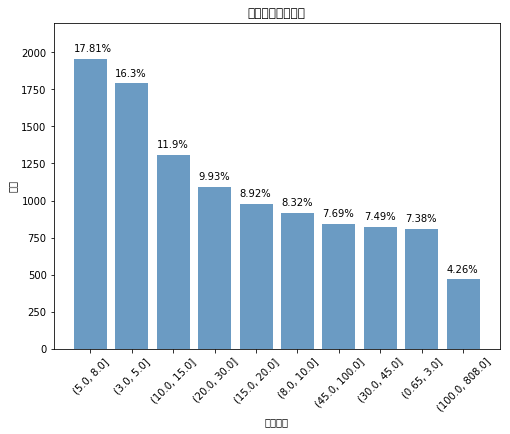

In [43]:
#画图

plt.rcParams['font.sans-serif'] = ['FangSong']
plt.rcParams['axes.unicode_minus'] = False
x = np.arange(len(price_state)) #有几根柱子
y = price_state #每根柱子对应的二手车数量
plt.figure(figsize = (8,6)) #画布大小
plt.bar(x,y,color = "steelblue",alpha = 0.8) #画图
plt.xticks(np.arange(len(price_state)),price_state.index,rotation = 45)
plt.xlabel("价格区间")
plt.ylabel("频数")
plt.title("二手车价格分布图")
plt.ylim([0,2200])
percents = [str(round(i*100,2)) + "%" for i in price_state / price_state.sum()]
for x,y,z in zip(x,y,percents):
    plt.text(x-0.4,y+50,z) # 百分数位置修正

In [44]:
#分析价格和行驶时长，路程的关系
data.diff_month


0        134
1        129
2        149
3         48
4         37
        ... 
11183     16
11184     76
11185    120
11186     70
11187     42
Name: diff_month, Length: 10984, dtype: int64

In [45]:
index = data['Brand'].isin(['奥迪','大众'])
somecars = data.loc[index,:]
somecars.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_month,Km_number,New_price_number
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,134,9.00,50.89
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,129,8.00,50.89
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,149,15.00,54.24
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,48,4.80,101.06
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,37,0.81,54.99


Text(0.5,1,'二手车价格分布图')

/Users/edward/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


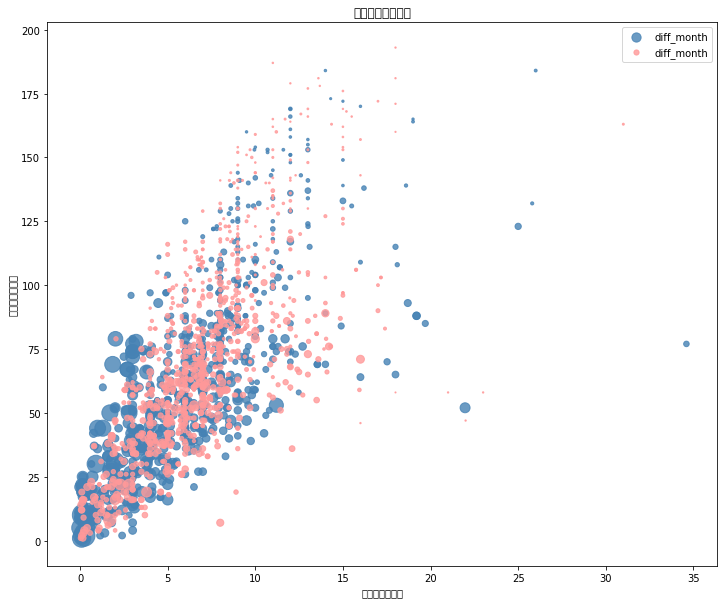

In [46]:
#画图

plt.rcParams['font.sans-serif'] = ['Microsoft YeHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (12,10)) #画布大小
brands_e = ['奥迪','大众']
colors = ['steelblue','#ff9999']
for i in range(len(brands_e)):
    plt.scatter(somecars[somecars['Brand'] == brands_e[i]]['Km_number'],
                somecars[somecars['Brand'] == brands_e[i]]['diff_month'],
                s = (somecars[somecars['Brand'] == brands_e[i]]['Sec_price']*2), #设置点的大小
                c = colors[i], #设置点的颜色
                alpha = 0.8,
                marker  = 'o') #设置点的形状
plt.legend(scatterpoints = 1 , markerscale = 0.6)
plt.xlabel("使用时长（月）")
plt.ylabel("公里数（公里）")
plt.title("二手车价格分布图")